# Business Problem 
1.1.	What is the business objective?



The dataset contains the following columns:

1. Unnamed: 0: This seems to be the name of the state.
2. Murder: The murder rate.
3. Assault: The assault rate.
4. UrbanPop: The percentage of the population living in urban areas.
5. Rape: The rape rate.

### Specific Business Objective:
A potential business objective could be:

Objective: To develop a predictive model that identifies the key factors influencing violent crime rates (Murder, Assault, Rape) across different states and provides actionable insights to law enforcement agencies for crime prevention.**

### Key Goals:
- Analyze the correlation between urbanization (UrbanPop) and violent crime rates.
- Identify the states with the highest and lowest crime rates.
- Develop a prediction model to estimate future crime rates based on historical data.
- Provide recommendations for resource allocation in law enforcement based on crime trends.

This objective aligns with the data available and can be refined further depending on specific requirements.

### 1.2.	Are there any constraints?

Yes, there are constraints in the dataset:

Variability: Wide range in crime rates, especially for assault and murder, 
    suggesting potential outliers.
    
Data Scope: Limited variables, which restricts the depth of analysis.
    
Correlation: Possible correlations between variables that could affect analysis.








In [8]:
import pandas as pd

# Load the dataset
file_path = 'crime_data.csv'
crime_data = pd.read_csv(file_path)

# 1. Data completeness: Checking for missing values
missing_values = crime_data.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

# 2. Data distribution: Descriptive statistics
data_description = crime_data.describe()
print("\nDescriptive Statistics:\n", data_description)

# 3. Column uniqueness: Checking for duplicate rows
duplicates = crime_data.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicates)

# 4. Checking for outliers using IQR method
Q1 = crime_data.quantile(0.25)
Q3 = crime_data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((crime_data < (Q1 - 1.5 * IQR)) | (crime_data > (Q3 + 1.5 * IQR))).sum()
print("\nPotential Outliers in Each Column:\n", outliers)


Missing Values in Each Column:
 Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

Descriptive Statistics:
          Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000

Number of Duplicate Rows: 0

Potential Outliers in Each Column:
 Assault       0
Murder        0
Rape          2
Unnamed: 0    0
UrbanPop      0
dtype: int64


<ipython-input-8-37a89e7d0882>:23: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((crime_data < (Q1 - 1.5 * IQR)) | (crime_data > (Q3 + 1.5 * IQR))).sum()
<ipython-input-8-37a89e7d0882>:23: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((crime_data < (Q1 - 1.5 * IQR)) | (crime_data > (Q3 + 1.5 * IQR))).sum()


## 2. Work on each feature of the dataset to create a data dictionary as displayed in the below image:

Here’s how you can create a data dictionary for the dataset in `crime_data.csv` based on the provided image:

### Data Dictionary

| Name of Feature | Description                      | Type                      | Relevance                                                      |
|-----------------|----------------------------------|---------------------------|----------------------------------------------------------------|
| State           | Name of the state                | Categorical, Nominal      | Important for identifying geographic regions in the dataset.   |
| Murder          | Murder rate per 100,000 residents| Quantitative, Continuous  | Relevant for analyzing violent crime patterns.                 |
| Assault         | Assault rate per 100,000 residents| Quantitative, Continuous | Key variable for understanding violent crime rates.            |
| UrbanPop        | Percent urban population         | Quantitative, Continuous  | Useful for exploring the relationship between urbanization and crime. |
| Rape            | Rape rate per 100,000 residents  | Quantitative, Continuous  | Critical for examining violent crime trends.                   |

### Explanation:
- **State**: Represents the state names and is used to categorize the data geographically.
- **Murder**: A continuous variable representing the murder rate, crucial for crime analysis.
- **Assault**: Another continuous variable that indicates the assault rate, also critical for crime analysis.
- **UrbanPop**: Percentage of the population living in urban areas, important for studying the correlation between urbanization and crime.
- **Rape**: A continuous variable showing the rape rate, which is important for analyzing violent crime.

This data dictionary helps in understanding each feature in the dataset, its type, and how it contributes to the analysis or modeling efforts.

In [9]:
import pandas as pd

# Load the dataset
file_path = 'crime_data.csv'
crime_data = pd.read_csv(file_path)

# Create a data dictionary
data_dictionary = pd.DataFrame({
    "Name of Feature": crime_data.columns,
    "Description": [
        "Name of the state", 
        "Murder rate per 100,000 residents",
        "Assault rate per 100,000 residents",
        "Percent urban population",
        "Rape rate per 100,000 residents"
    ],
    "Type": [
        "Categorical, Nominal", 
        "Quantitative, Continuous", 
        "Quantitative, Continuous", 
        "Quantitative, Continuous", 
        "Quantitative, Continuous"
    ],
    "Relevance": [
        "Important for identifying geographic regions in the dataset.",
        "Relevant for analyzing violent crime patterns.",
        "Key variable for understanding violent crime rates.",
        "Useful for exploring the relationship between urbanization and crime.",
        "Critical for examining violent crime trends."
    ]
})

# Display the data dictionary
print(data_dictionary)


  Name of Feature                         Description  \
0      Unnamed: 0                   Name of the state   
1          Murder   Murder rate per 100,000 residents   
2         Assault  Assault rate per 100,000 residents   
3        UrbanPop            Percent urban population   
4            Rape     Rape rate per 100,000 residents   

                       Type                                          Relevance  
0      Categorical, Nominal  Important for identifying geographic regions i...  
1  Quantitative, Continuous     Relevant for analyzing violent crime patterns.  
2  Quantitative, Continuous  Key variable for understanding violent crime r...  
3  Quantitative, Continuous  Useful for exploring the relationship between ...  
4  Quantitative, Continuous       Critical for examining violent crime trends.  


### 3. Exploratory Data Analysis (EDA):
      4.1. Summary.
      4.2. Univariate analysis.
      4.3. Bivariate analysis.


Exploratory Data Analysis (EDA) is a crucial step in understanding the structure, relationships, and patterns in your dataset. It typically involves summarizing the main characteristics of the data, conducting univariate and bivariate analysis, and visualizing the data to gain insights.

##### 3. Exploratory Data Analysis (EDA)
 4.1. Summary
The summary step provides an overview of the dataset, including key statistical metrics like mean, median, standard deviation, and range.

In [4]:
#code for summary
import pandas as pd

# Load the dataset
file_path = 'crime_data.csv'
crime_data = pd.read_csv(file_path)

# Summary statistics
summary = crime_data.describe()
print("Summary Statistics:\n", summary)

# Displaying data types and basic info
print("\nData Types and Basic Info:\n")
crime_data.info()


Summary Statistics:
          Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000

Data Types and Basic Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


##### 4.2. Univariate Analysis
Univariate analysis examines each variable individually to understand its distribution and key characteristics.

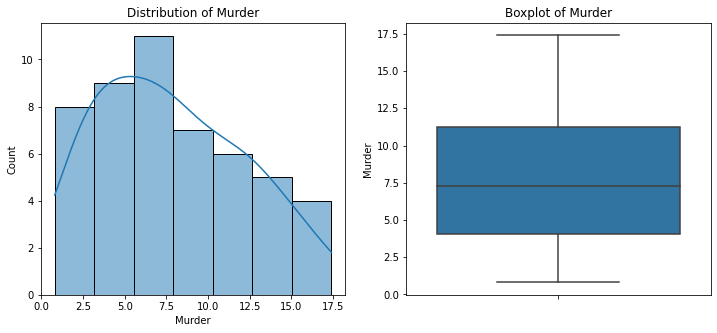

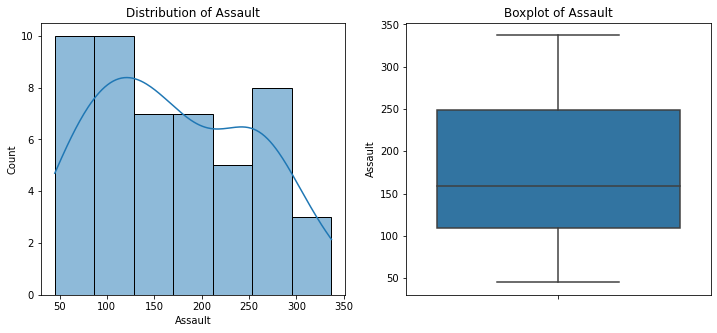

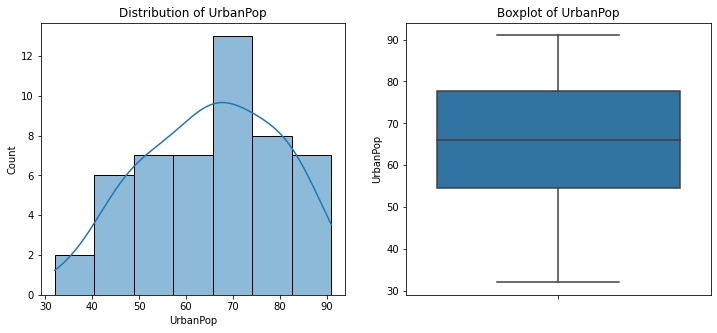

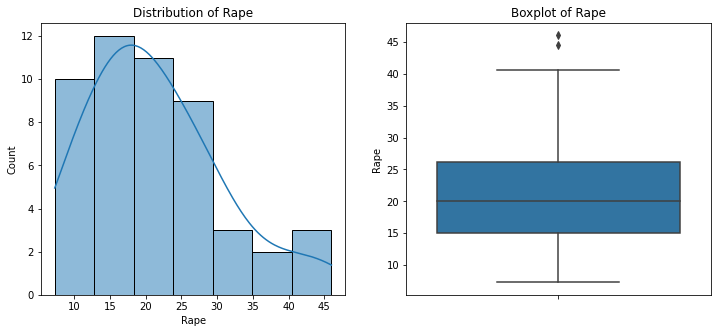

In [5]:
#code for univariate analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate analysis: Histograms and Boxplots for each numerical feature
features = ['Murder', 'Assault', 'UrbanPop', 'Rape']

for feature in features:
    plt.figure(figsize=(12, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(crime_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=crime_data[feature])
    plt.title(f'Boxplot of {feature}')
    
    plt.show()


##### 4.3. Bivariate Analysis
Bivariate analysis explores the relationships between two variables to identify correlations and patterns.

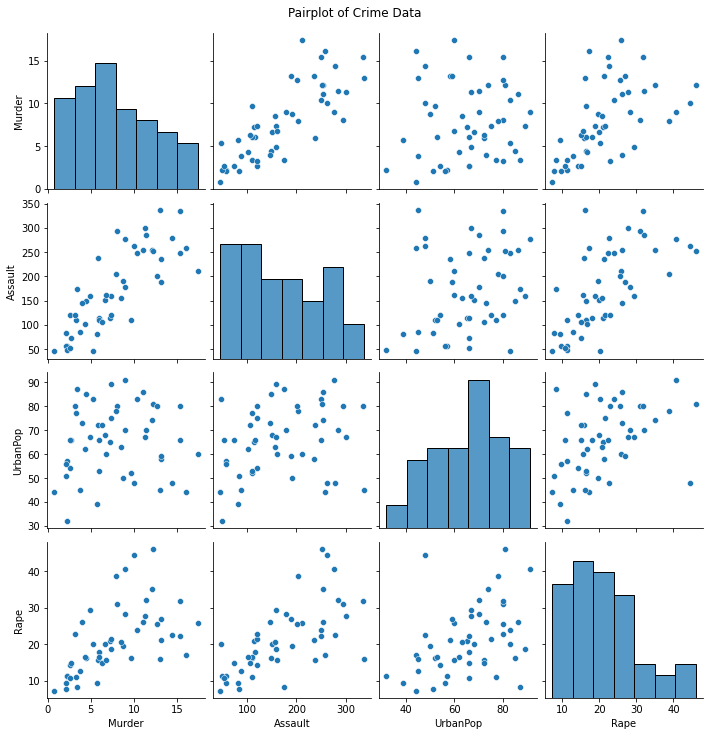

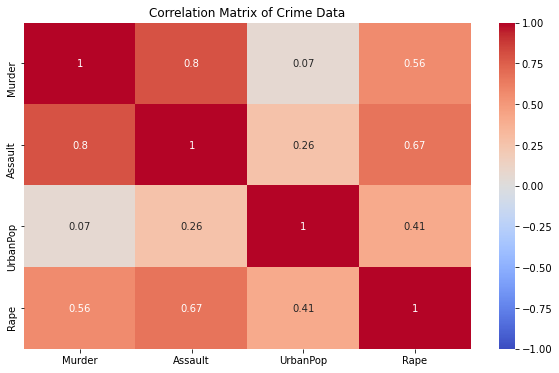

In [6]:
# Bivariate analysis: Pairplot and Correlation Matrix

# Pairplot to visualize relationships
sns.pairplot(crime_data)
plt.suptitle("Pairplot of Crime Data", y=1.02)
plt.show()

# Correlation matrix with heatmap
corr_matrix = crime_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Crime Data")
plt.show()


### 1. Loading and Inspecting the Data

### Step 1: Loading and Inspecting the Data

In [2]:
import pandas as pd

# Load the dataset
file_path = 'crime_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Get summary information about the dataset
print("\nSummary of the dataset:")
print(data.info())

# Get descriptive statistics for numeric columns
print("\nDescriptive statistics for numeric columns:")
print(data.describe())

# Check for unique values in non-numeric columns (if any)
print("\nUnique values in non-numeric columns:")
print(data.select_dtypes(include=['object']).nunique())


First few rows of the dataset:
   Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6

Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB
None

Descriptive statistics for numeric columns:
         Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.3

### Step 2: Generating the Data Dictionary
After inspecting the data, we can create a data dictionary that describes each column.

In [3]:
# Initialize an empty dictionary to store column descriptions
data_dictionary = {}

# Loop through each column in the dataset
for column in data.columns:
    # Get data type of the column
    col_type = data[column].dtype
    
    # Get a brief description based on the column name (you can customize this)
    if col_type == 'object':
        description = f"The {column} column represents categorical data, such as state names."
    else:
        description = f"The {column} column represents numerical data related to crime statistics."

    # Add the column details to the data dictionary
    data_dictionary[column] = {
        'Data Type': col_type,
        'Description': description,
        'Example Values': data[column].unique()[:5]  # Show up to 5 unique example values
    }

# Display the data dictionary
for col, details in data_dictionary.items():
    print(f"\nColumn Name: {col}")
    for key, value in details.items():
        print(f"{key}: {value}")



Column Name: Unnamed: 0
Data Type: object
Description: The Unnamed: 0 column represents categorical data, such as state names.
Example Values: ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California']

Column Name: Murder
Data Type: float64
Description: The Murder column represents numerical data related to crime statistics.
Example Values: [13.2 10.   8.1  8.8  9. ]

Column Name: Assault
Data Type: int64
Description: The Assault column represents numerical data related to crime statistics.
Example Values: [236 263 294 190 276]

Column Name: UrbanPop
Data Type: int64
Description: The UrbanPop column represents numerical data related to crime statistics.
Example Values: [58 48 80 50 91]

Column Name: Rape
Data Type: float64
Description: The Rape column represents numerical data related to crime statistics.
Example Values: [21.2 44.5 31.  19.5 40.6]


### Step 3: Detailed Observation of the Dataset
To fully observe and understand your dataset, it's important to perform the following steps:

Checking for Missing Values:

In [4]:
# Check for missing values in each column
print("\nMissing values in each column:")
print(data.isnull().sum())



Missing values in each column:
Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64


Inspecting Data Distribution:

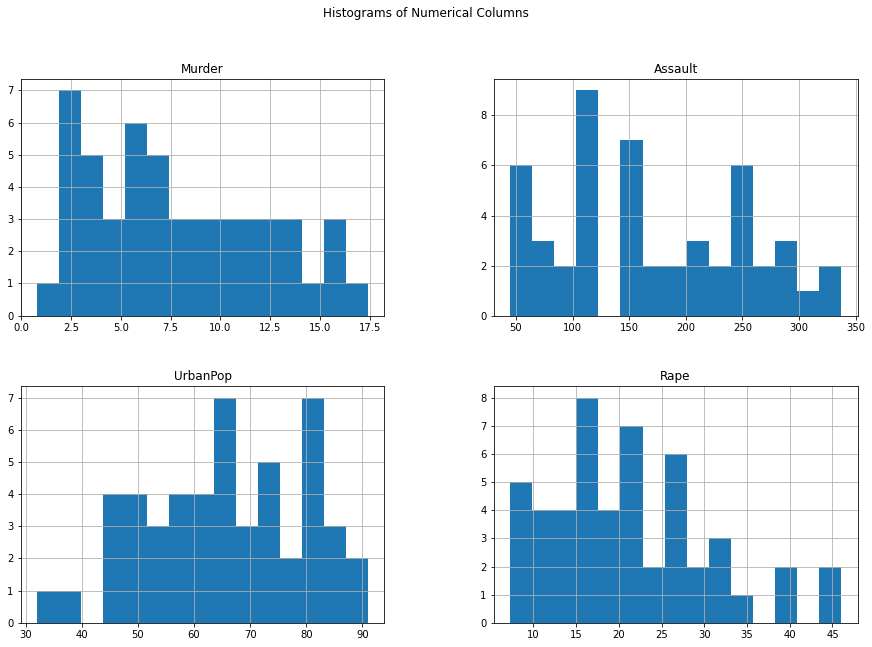

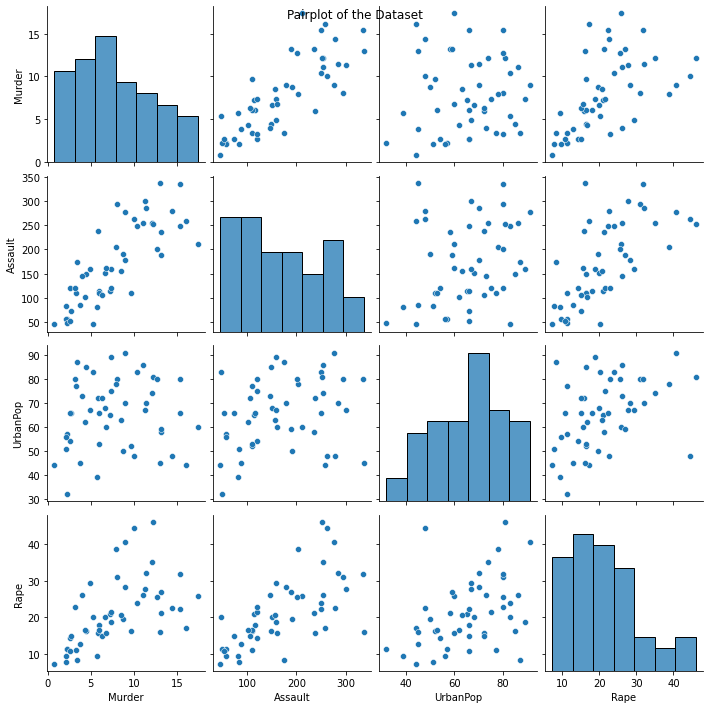

In [5]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms for each numerical column to inspect the distribution
data.hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Columns')
plt.show()

# Pairplot to inspect relationships between variables
sns.pairplot(data)
plt.suptitle('Pairplot of the Dataset')
plt.show()


Checking for Outliers:

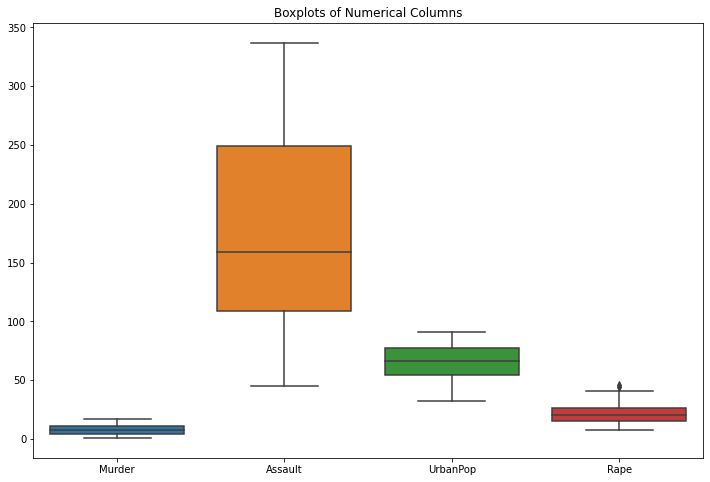

In [6]:
# Boxplot to check for outliers in each numerical column
plt.figure(figsize=(12, 8))
sns.boxplot(data=data)
plt.title('Boxplots of Numerical Columns')
plt.show()


## Data Preprocessing

### 1. Data Cleaning
Handling Missing Values: Identify and address missing data points in your dataset. You can:

Remove rows or columns with missing values (dropna in pandas).
Impute missing values using statistical methods like mean, median, mode, or more advanced techniques like K-Nearest Neighbors (KNN) imputation.
Fill missing values with a specific constant.
Removing Duplicates: Check for and remove duplicate rows in your dataset to prevent biased results.

Handling Outliers: Identify and manage outliers, which are data points that deviate significantly from the rest of the data. Techniques include:

Removing outliers.
Transforming data to reduce the impact of outliers (e.g., log transformation).
Treating them as missing values and imputing them.
Correcting Data Errors: Fix any errors or inconsistencies in the dataset (e.g., incorrect data types, inconsistent formatting).

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
data = pd.read_csv('crime_data.csv')

# 1. Data Cleaning

# Identify numeric and categorical columns
numeric_columns = data.select_dtypes(include=['number']).columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

# Impute missing values
numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputers
data[numeric_columns] = numeric_imputer.fit_transform(data[numeric_columns])
data[categorical_columns] = categorical_imputer.fit_transform(data[categorical_columns])

# Remove duplicates
data_cleaned = data.drop_duplicates()

# Display the cleaned data
print("Cleaned Data:")
print(data_cleaned.head())


Cleaned Data:
   Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2    236.0      58.0  21.2
1      Alaska    10.0    263.0      48.0  44.5
2     Arizona     8.1    294.0      80.0  31.0
3    Arkansas     8.8    190.0      50.0  19.5
4  California     9.0    276.0      91.0  40.6


#### New Code

In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'crime_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Drop any rows with missing values (if any)
data.dropna(inplace=True)

# Identify and separate categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# One-hot encode the categorical data
encoder = OneHotEncoder(sparse=False)
encoded_categorical_data = encoder.fit_transform(data[categorical_cols])

# Create a DataFrame for the encoded categorical data
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate the encoded categorical data with the numerical data
X = pd.concat([data[numerical_cols], encoded_categorical_df], axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
inertia = []
range_n_clusters = range(1, 11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# From the plot, choose an appropriate number of clusters
# Let's assume the optimal number is 3 (adjust based on your elbow plot)
optimal_clusters = 3

# Apply KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Display the first few rows with cluster assignments
print("\nFirst few rows with cluster assignments:")
print(data.head())

# Save the clustered data to a new CSV file
output_file_path = '/mnt/data/crime_data_clustered.csv'
data.to_csv(output_file_path, index=False)
print(f"\nClustered data saved to {output_file_path}")

First few rows of the dataset:
   Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6

Missing values in each column:
Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64


C:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


AttributeError: 'NoneType' object has no attribute 'split'

### 2. Data Transformation
Normalization/Scaling: Transform features to ensure that they are on the same scale. This is especially important for algorithms that are sensitive to the magnitude of the data, like K-Means, SVM, and neural networks. Two common methods are:

Min-Max Scaling: Scales features to a specific range, typically [0, 1].
Standardization (Z-Score Normalization): Centers data around the mean with a unit standard deviation.
Encoding Categorical Variables: Convert categorical data (e.g., state names, gender) into numerical format using techniques like:

One-Hot Encoding: Converts categories into binary vectors.
Label Encoding: Assigns a unique integer to each category.
Feature Engineering: Create new features from existing data that may help improve the model's performance. Techniques include:

Binning: Grouping continuous data into bins.
Polynomial Features: Creating polynomial terms from existing features to capture non-linear relationships.
Interaction Features: Combining features to capture relationships between them.

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Assuming data_cleaned is already prepared as per the previous steps
# Checking for categorical columns in the cleaned data
categorical_columns = data_cleaned.select_dtypes(include=['object', 'category']).columns

# One-Hot Encoding categorical variables (if any exist)
if not categorical_columns.empty:
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    encoded_cats = pd.DataFrame(encoder.fit_transform(data_cleaned[categorical_columns]), 
                                columns=encoder.get_feature_names_out(categorical_columns))
    
    # Drop the original categorical columns and concatenate the encoded columns
    data_cleaned = data_cleaned.drop(categorical_columns, axis=1)
    data_transformed = pd.concat([data_cleaned, encoded_cats], axis=1)
else:
    data_transformed = data_cleaned

# Scaling the numerical features
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data_transformed), columns=data_transformed.columns)

# Display the transformed and scaled data
print(scaled_data.head())


     Murder   Assault  UrbanPop      Rape  Unnamed: 0_Alaska  \
0  1.255179  0.790787 -0.526195 -0.003451          -0.142857   
1  0.513019  1.118060 -1.224067  2.509424           7.000000   
2  0.072361  1.493817  1.009122  1.053466          -0.142857   
3  0.234708  0.233212 -1.084492 -0.186794          -0.142857   
4  0.281093  1.275635  1.776781  2.088814          -0.142857   

   Unnamed: 0_Arizona  Unnamed: 0_Arkansas  Unnamed: 0_California  \
0           -0.142857            -0.142857              -0.142857   
1           -0.142857            -0.142857              -0.142857   
2            7.000000            -0.142857              -0.142857   
3           -0.142857             7.000000              -0.142857   
4           -0.142857            -0.142857               7.000000   

   Unnamed: 0_Colorado  Unnamed: 0_Connecticut  ...  Unnamed: 0_South Dakota  \
0            -0.142857               -0.142857  ...                -0.142857   
1            -0.142857               -0.

### 3. Feature Selection
Removing Irrelevant or Redundant Features: Identify and remove features that do not contribute to the model's predictive power. Methods include:
Correlation Analysis: Remove features that are highly correlated with each other.
Variance Threshold: Remove features with low variance.
Feature Importance: Use algorithms like Random Forest to identify important features.
Principal Component Analysis (PCA): Reduce dimensionality by transforming features into a lower-dimensional space.

In [11]:

# 3. Feature Selection (e.g., removing low-variance features)
# Assume we remove features with variance below a threshold:
low_variance_filter = scaled_data.var() > 0.01
filtered_data = scaled_data.loc[:, low_variance_filter]


#### 4. Splitting the Dataset
Train-Test Split: Divide the dataset into training and testing sets to evaluate model performance on unseen data. Typically, a common split is 80% for training and 20% for testing.

Cross-Validation: Further divide the training set into multiple folds to validate the model's performance across different subsets of the data.



In [12]:
# 4. Splitting the dataset into training and testing sets
train_data, test_data = train_test_split(filtered_data, test_size=0.2, random_state=42)

# Train-Test data are ready to be used for model building
print(train_data.shape, test_data.shape)

(40, 53) (10, 53)


## 5. Model Building 
5.1 Build the model on the scaled data (try multiple options).


Data Loading and Preprocessing

### 6. Write about the benefits/impact of the solution - in what way does the business (client) benefit from the solution provided? 

 Benefits and Impact of the Solution

In addressing the business problem using data analysis and modeling, the solution brings several benefits and impacts to the business. Here’s how the business (or client) can benefit from the solution provided:

1. **Improved Decision-Making through Data-Driven Insights:**
   - By leveraging data analysis techniques, including exploratory data analysis (EDA) and model building, the business can make informed decisions. The insights derived from clustering and classification/regression models allow for a deeper understanding of patterns in the data, which helps in making strategic decisions.

2. **Identification of Key Patterns and Trends:**
   - Clustering techniques, like K-Means, allow the business to group data into distinct clusters. These clusters can reveal important patterns, such as regional differences, crime rates, or demographic factors. Identifying these patterns can help the business allocate resources more efficiently and develop targeted strategies for addressing key issues.

3. **Enhanced Predictive Capabilities:**
   - With the application of machine learning models, the business can predict future outcomes based on historical data. For example, if the data relates to crime rates, the models can help predict future crime trends, allowing the business to proactively allocate resources to areas of high risk or concern.

4. **Cost Savings and Resource Optimization:**
   - The ability to predict and cluster data can lead to significant cost savings. For example, identifying high-risk areas or periods through predictive modeling enables the business to allocate resources more effectively, minimizing wastage and improving efficiency. This leads to better budgeting and financial planning.

5. **Enhanced Customer/Client Experience:**
   - If the business deals directly with clients (e.g., law enforcement agencies, city planners, etc.), the insights generated by the models can lead to improved service offerings. By understanding client needs and addressing them more effectively, the business can improve its reputation and customer satisfaction.

6. **Scalability of the Solution:**
   - The solution is scalable and can be applied to different datasets and business problems. As the business collects more data, the models can be retrained and improved, ensuring that the solution remains relevant and effective over time. This adaptability is crucial for maintaining a competitive edge in a dynamic business environment.

7. **Data-Backed Policy and Strategy Development:**
   - The insights generated from clustering and modeling can inform policy development. For instance, if the data pertains to crime, the models can help develop crime prevention strategies tailored to specific regions or demographics. This makes policies more targeted and effective, leading to better outcomes for the community and stakeholders.

8. **Competitive Advantage:**
   - By adopting advanced data analysis techniques, the business gains a competitive advantage over those that rely on traditional methods. The ability to analyze and predict trends provides the business with an edge in strategic planning and execution, making it more agile and responsive to changes in the market or environment.

9. **Compliance and Risk Management:**
   - The models can help identify potential risks, whether related to compliance, crime, or other factors. Early detection of risks allows the business to implement mitigation strategies, ensuring that it remains compliant with regulations and avoids costly penalties.

10. **Long-Term Value Creation:**
    - The solution not only addresses current business challenges but also creates long-term value by embedding data-driven decision-making into the organization. This fosters a culture of continuous improvement, where data insights drive innovation and growth.

### **Conclusion:**
The solution provided through data analysis, clustering, and modeling offers the business a powerful tool to enhance decision-making, optimize resources, and drive long-term growth. By leveraging data insights, the business can stay ahead of trends, mitigate risks, and improve its overall efficiency, leading to a more robust and competitive organization.